## OVERVIEW 

In this activity, the goal is to find insights into unicorn companies–companies that are valued at over one billion dollars. The data for this task provides information on over 1,000 unicorn companies, including their industry, country, year founded, and select investors. This information will be used to gain 

- Insights into how and when companies reach this prestigious milestone and to make recommendations for the next steps an investing firm.
- Time it took companies to reach unicorn status. That is reach billion dolloars status in valuation. 
- The maximum unicorn company valuation per industry
- Insights into unicorn companies–companies that are valued at over one billion dollars.
- Gain more insight on a specific year
- Observe Trends Over Time of companies that became unicorns for a particular year of choice.

In [38]:
# import libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
companies = pd.read_csv("/Users/henryasiamah/Desktop/DSI Infinity/Google Advance Data Analytics/Exercises/Exploratory Data Analysis/Unicorn_Companies.csv")
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [4]:
companies.size

10740

The size of the dataset is 10740. This means that there are 10740 values in total across the whole dataset. That is the mulplication of the number of rows and columns is the size of the dataset.

In [6]:
# shape: rows, columns

companies.shape

(1074, 10)

In [7]:
# Info
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [8]:
# descriptive statistics
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [9]:
# convert date to datetime

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

In [10]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [11]:
# year joined unicorn status

companies["Year Joined"] = companies["Date Joined"].dt.year

In [12]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


Use .sample() with the n parameter set to 50 to randomly sample 50 unicorn companies from the data. Be sure to specify the random_state parameter to ensure reproducibility of your work. Save the result to a variable called companies_sampled.

In [22]:
# sample the data

companies_sample = companies.sample(n=50, random_state=42)

companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017


### Time it took companies to reach unicorn status

In [25]:
# Create new `years_till_unicorn` column 

companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

grouped = (companies_sample[["Industry", "years_till_unicorn"]].groupby(

            "Industry").max().sort_values(by="years_till_unicorn"))

grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


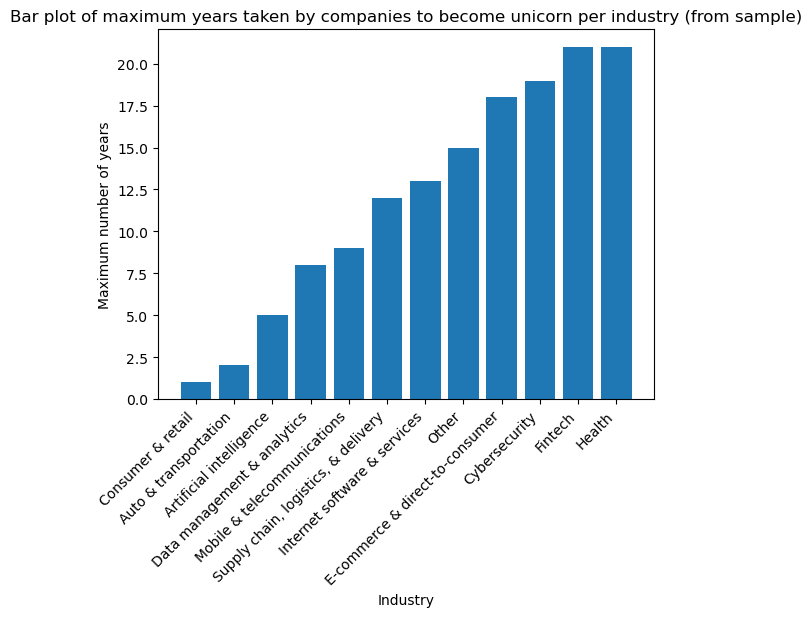

In [31]:
# create bar plot

plt.bar(grouped.index, grouped["years_till_unicorn"])

#set title
plt.title("Bar plot of maximum years taken by companies to become unicorn per industry (from sample)")

#set x-axis label
plt.xlabel("Industry")

#set y-axis label
plt.ylabel("Maximum number of years")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text
plt.xticks(rotation=45, horizontalalignment="right")

# Display the plot
plt.show()

This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while the smallest value occurred in the Consumer & Retail industry.

### Visualizing the maximum unicorn company valuation per industry

In [33]:
# converting column representing company valuation as numeric data

companies_sample["valuation_billions"] = companies_sample["Valuation"]

# remove $ sign from each value
companies_sample["valuation_billions"] = companies_sample["valuation_billions"].str.replace('$', '', regex=True)

# remove 'B' sign from each value
companies_sample["valuation_billions"] = companies_sample["valuation_billions"].str.replace('B', '', regex=True)

# convert column type to int
companies_sample["valuation_billions"] = companies_sample["valuation_billions"].astype('int')

companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


In [36]:
# prepare data for modelling 

grouped = (companies_sample[["Industry", "valuation_billions"]].groupby(
            "Industry")
           .max()
           .sort_values(by="valuation_billions")
)

grouped

,valuation_billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


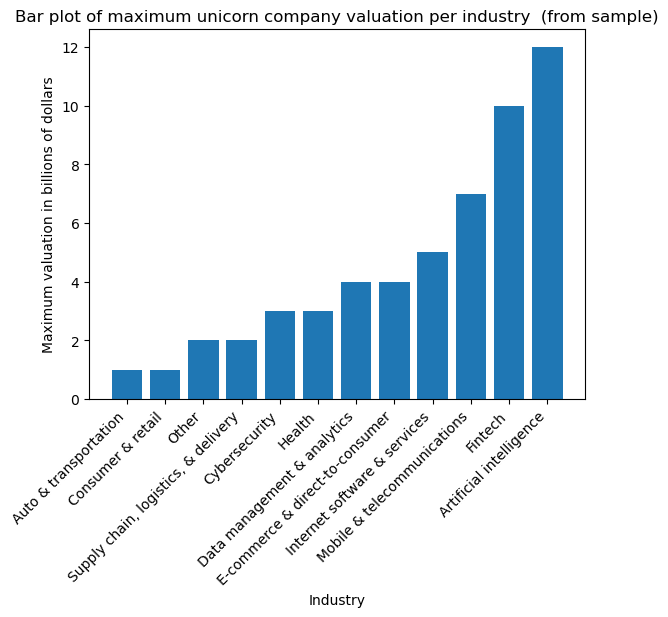

In [37]:
# create bar plot

plt.bar(grouped.index, grouped["valuation_billions"])

#set title
plt.title("Bar plot of maximum unicorn company valuation per industry  (from sample)")

#set x-axis label
plt.xlabel("Industry")

#set y-axis label
plt.ylabel("Maximum valuation in billions of dollars")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text
plt.xticks(rotation=45, horizontalalignment="right")

# Display the plot
plt.show()

This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the Artificial Intelligence industry, while the lowest maximum valuation occurred in the Auto & transportation, and Consumer & retail industries.

### Findings

- There are 1074 unicorn companies represented in this dataset.
- Some companies took longer to reach unicorn status but have accrued high valuation as of March 2022. Companies could take longer to achieve unicorn status for a number of reasons, including requiring more funding or taking longer to develop a business model.

### Insights into unicorn companies–companies that are valued at over one billion dollars.

In [63]:
companies = pd.read_csv("/Users/henryasiamah/Desktop/DSI Infinity/Google Advance Data Analytics/Exercises/Exploratory Data Analysis/Unicorn_Companies.csv")
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [64]:
 ## Check for duplicates

In [65]:
companies.drop_duplicates().shape

(1074, 10)

Since the shape that is returned after dropping duplicates is the same as the shape of the original DataFrame, you can infer that there are no duplicate values in the dataset.

In [66]:
# Display the data types of the columns.

companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [67]:
# To arrange the data from latest to earliest `Year Founded`

companies.sort_values(by= "Year Founded", ascending = False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/22,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


In [68]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.

companies["Year Founded"].value_counts().sort_values(ascending=False)

2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: Year Founded, dtype: int64

2015 has the highest count. This indicates that 2015 is the year when the largest number of companies in this dataset were founded.

Text(0.5, 1.0, 'Year Founded Histogram')

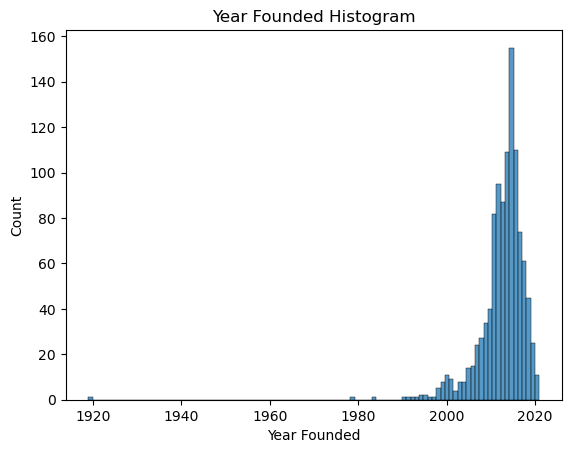

In [69]:
# plot a histogram of the data above 

sns.histplot(data=companies, x="Year Founded")
plt.title("Year Founded Histogram")

In [70]:
# Convert the Date Joined Column to datetime

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])


# Display the data types of the columns in `companies`
companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [71]:
# Create a Month Joined Column to show when company became a unicorn

companies["Month Joined"] = companies["Date Joined"].dt.month_name()

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


In [72]:
# How many years it took to be unicorn
# create years to join column 

companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Year Founded"]

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


## Gain more insight on a specific year

In [73]:
# Filter dataset by a year of your interest 
# (in terms of when companies reached unicorn status).

companies_2021 = companies[companies["Date Joined"].dt.year == 2021]

companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


## Observe Trends Over Time by weeks in 2021

In [74]:
# Insert a `Week Joined` column into `companies_2021.`

companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

companies_2021.head()

,Company,Valuation,Date Joined,Week Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,2021-W29,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,2021-W14,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,2021-W07,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,2021-W29,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,2021-W12,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


In [75]:
companies_by_week_21 = companies_2021.groupby(["Week Joined"])[["Company"]].count().reset_index().rename(columns={"Company":"Company Count"})
companies_by_week_21.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


### Compare Trends Overtime 

Implementing the structuring approach indentified in order to compare trends over time in the average valuation of companies that became unicorns between your years of interest. 

In [76]:
# Filter by the additional year to create a subset 
# that consists of companies that joined in that year.
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

# Add `Quarter Joined` column to `companies_2021`.
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
companies_2020_2021["Valuation"] = companies_2020_2021["Valuation"].str.strip("$B").astype(float)

companies_2020_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join,Quarter Joined
22,Genki Forest,15.0,2020-03-01,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro...",March,4,2020-Q1
23,goPuff,15.0,2020-10-08,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital",October,7,2020-Q4
38,Xingsheng Selected,12.0,2020-07-22,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China",July,11,2020-Q3
54,Figma,10.0,2020-04-30,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per...",April,8,2020-Q2
57,Notion Labs,10.0,2020-04-01,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures",April,4,2020-Q2


In [77]:
# Group `companies_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that 
# joined per quarter of each year.

companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})
companies_by_quarter_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


## Time-to-unicorn visualization
### Visualizing the time it took companies to become unicorns

In [78]:
# A list that contains months in chronological order.

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

# print to confirm order
print(month_order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


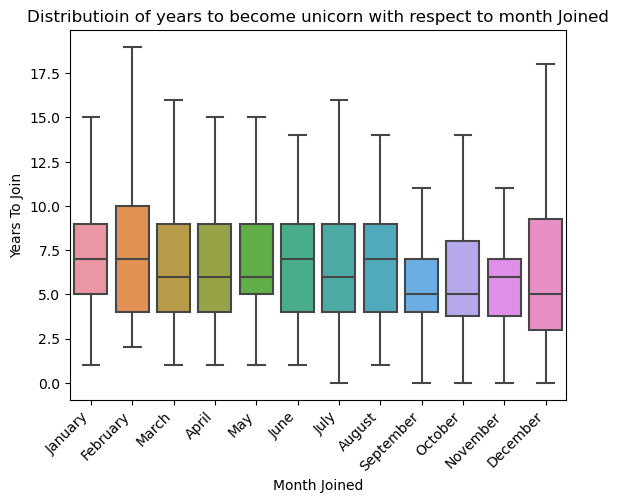

In [79]:
# Box Plot visualisation
sns.boxplot(x=companies["Month Joined"],
            y=companies["Years To Join"],
            order=month_order,
            showfliers=False)

# Set the title of the plot
plt.title("Distributioin of years to become unicorn with respect to month Joined")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text. 
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()

In the preceding box plot, the median value for Years To Join is different for each month. Also, the median Years To Join is lower for the months of September and October. This could indicate that companies that reached unicorn status in early fall took less time to reach $1 billion valuation. This is because the number of companies is relatively close/consistent for each month. If that were not the case, it would be misleading to compare the median values from the box plots between months.

## Results and Evaluation
### Visualise the time it took companies to reach unicorn status

Creating a bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded.

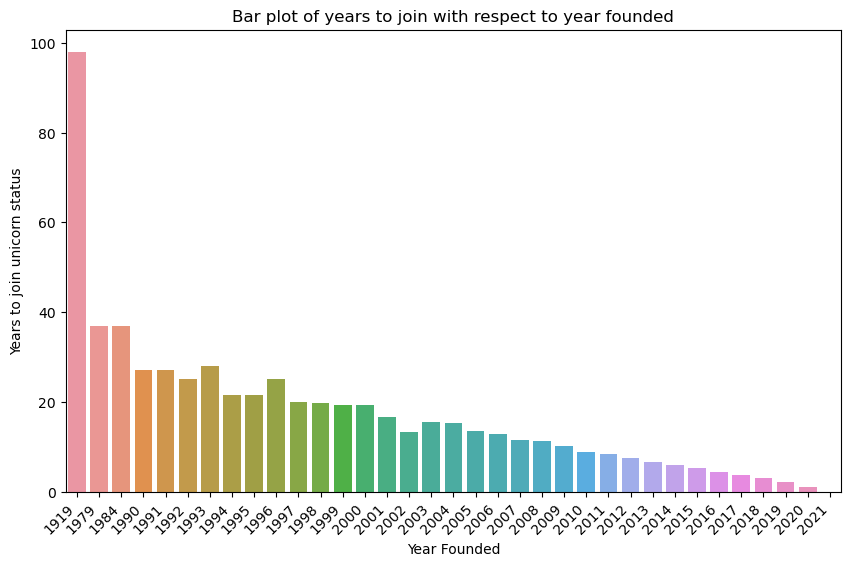

In [84]:
# set the size of the plot

plt.figure(figsize=(10,6))

# Create bar plot to visualize the average number of years it 
# took companies to reach unicorn status with respect to 
# when they were founded using the companies dataframe

sns.barplot(x=companies["Year Founded"], y=companies["Years To Join"], errorbar=('ci', False))

# Set Title
plt.title("Bar plot of years to join with respect to year founded")

# Set x-axis label
plt.xlabel("Year Founded")

# Set y-axis label
plt.ylabel("Years to join unicorn status")

# Rotate the labels on the x-axis as a way to avoid overlap in the 
# positions of the text.  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

There appears to be a trend wherein companies that were founded later took less time to reach unicorn status, on average.This is a bias that is common in time data—because companies founded in later years have been around for less time. Therefore, there is less time to collect data on such companies compared to companies founded in earlier years).

## Visualize the number of companies that joined per interval

Creating a bar plot to visualize the number of companies that joined per interval for that year.

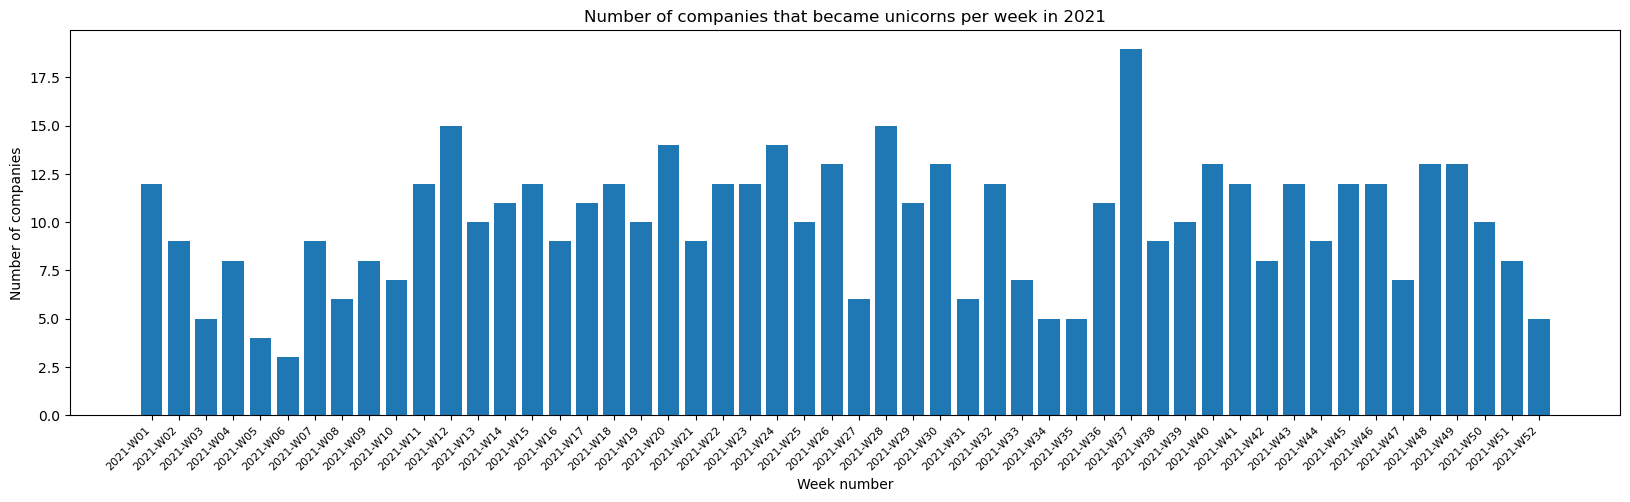

In [87]:
# size of the plot

plt.figure(figsize=(20, 5))

# Create bar plot to visualize number of companies that 
# joined per interval for the year of interest.

plt.bar(x=companies_by_week_21['Week Joined'],height=companies_by_week_21['Company Count'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of companies")
plt.title("Number of companies that became unicorns per week in 2021")

# Rotate the labels on the x-axis as a way to avoid overlap 
# in the positions of the text.
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

plt.show()

- Observations from a bar plot of the number of companies that became unicorns per week in 2021:

  - The number of companies that joined unicorn status fluctuated over the weeks of 2021, with a trend of decline followed by increase occurring periodically.
  - The highest number of companies reached $1 billion valuation in Week 37 of 2021, which corresponds to the third week of September 2021. 
  - The weeks in 2021 with the next highest number of companies becoming unicorns are Week 12 (which corresponds to the fourth week of March) and Week 28 (which corresponds to the third week of July). 
  

## Visualize the average valuation over the quarters

Creating a grouped bar plot to visualize the average valuation over the quarters, with two bars for each time interval. That is two bars for each time interval. This allows you to compare quarterly values between the two years.

In [88]:
companies_by_quarter_2020_2021.head(2)

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778


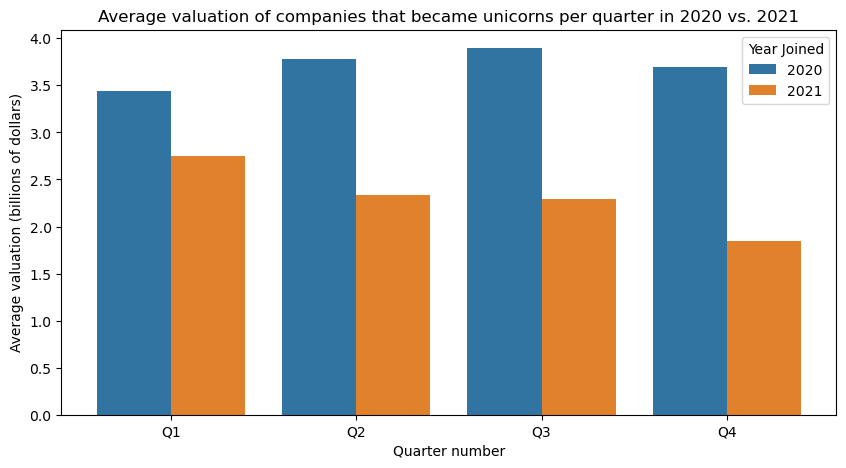

In [89]:
# Using slicing, extract the year component and the time interval 
# that you specified, and save them by adding two new columns 
# into the subset. 

companies_by_quarter_2020_2021["Quarter Number"] = companies_by_quarter_2020_2021["Quarter Joined"].str[-2:]
companies_by_quarter_2020_2021["Year Joined"] = companies_by_quarter_2020_2021["Quarter Joined"].str[:4]

# Set the size of the plot.
plt.figure(figsize = (10, 5))

# Create a grouped bar plot.
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])

plt.plot()
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")
plt.show()

- Observations from a grouped bar plot of average valuation of companies that became unicorns per quarter in 2020 vs. 2021:

  - In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021. 
  - In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of increase from Q1 to Q2 and from Q2 to Q3. 
  - In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of decrease across the quarters.

- **Potential bias**:

  - If there were bias in terms of which cities and countries were taken into account when collecting the data, then the analysis would be more representative of the cities and countries that are in the dataset than those that are not.
  - If the dataset did not include certain industries, then the analysis would be more representative of the industries that are included and may not reflect trends in those that are excluded from the data. 
  - If the dataset had time gaps, (e.g., if companies that joined in certain windows of time were not included in the data), then that may have affected the patterns observed, depending on how salient the gaps were.
  - Another point of bias pertains to the nature of time data; there have been fewer years to collect data on companies that were founded more recently than for companies that were founded longer ago.

**Findings**

- There are 1074 unicorn companies represented in this dataset.
- 2015 is the year when the most number of unicorn companies were founded. 
- Many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. 
- The box plot created shows that companies that become unicorns in the months of September and October have a smaller median value for how long it took to become unicorns.
- One of the bar plots created shows that the average valuation of companies that joined in 2020 is highest in the third quarter of the year, whereas the average valuation of companies that joined in 2021 is highest in the first quarter of the year.

**Recommendations**

- According to data analysis that was conducted on a dataset of 1074 unicorn companies, companies that joined in the months of September and October tended to take less time to become unicorns.
- Another finding was that many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. So if the stakeholders want to invest in companies founded in 2021, it would be a good idea to consider companies that belong to these industries, as they may be strong candidates for becoming unicorns.
- It was also discovered that the average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is the third quarter of the year. When considering companies that newly join in the future, it would be worth closely looking at companies that join in the first and third quarters of the year. 
- The data can be analyzed further to gather more insights that are specific to the interests of the investing firm and the stakeholders. 